In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.datasets
from sklearn.decomposition import PCA, TruncatedSVD

### Nacitaj tvare

In [20]:
_, _, files = list(os.walk("photos64"))[0]

faces = dict()

for f in files:
    f.encode('unicode_escape')
    img = cv2.imread("photos64/"+f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces[f] = gray


### Nacitanie trenovacieho dataset

In [21]:
images = np.dstack([f.T for f in faces.values()]).T

In [22]:
images.shape

(274, 64, 64)

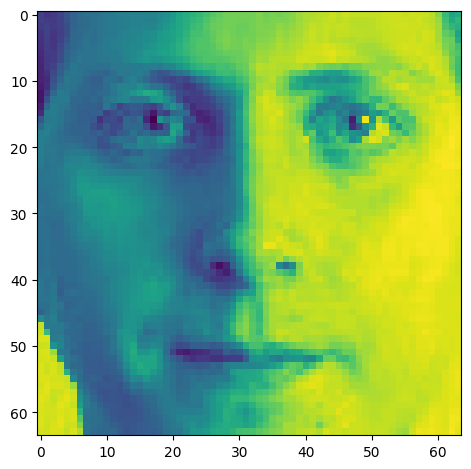

In [23]:
plt.imshow(images[0])

### Priemerna tvar

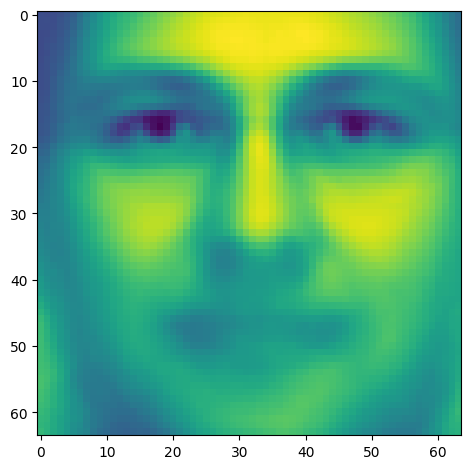

In [24]:
avg_face = np.zeros(64*64)    
for face in images:
    face_vec = face.flatten()
    avg_face += face_vec

avg_face = avg_face/len(images)
avg_face_img = avg_face.reshape(64, 64)
plt.imshow(avg_face_img)

### Rozdielny trenovacich oproti priemernej tvary

In [25]:
face_train_diffs = list()
for face in images:
    face_vec = face.flatten()
    face_train_diffs.append(face_vec - avg_face)

### Vypocitaj eigenfaces

In [26]:
A = np.matrix([i for i in face_train_diffs]).T
U, S, VT = np.linalg.svd(A, full_matrices=0)
U.shape

(4096, 274)

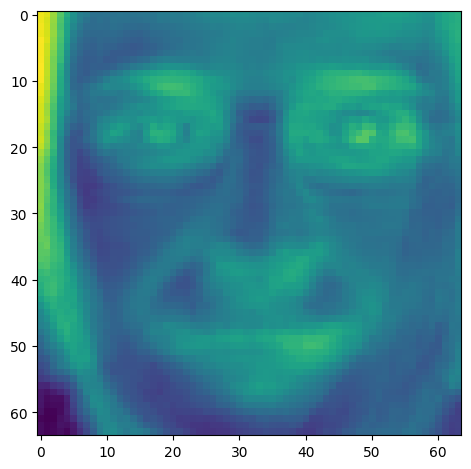

In [27]:
plt.imshow(U[:, 6].reshape(64, 64))

### Rozdielny nasich oproti priemernej tvary

In [28]:
face_diffs = dict()
for name, face in faces.items():
    face = cv2.blur(face,(5,5))
    face_vec = face.flatten()
    face_diffs[name] = face_vec - avg_face

### Vypocitaj koeficienty eigenfaces pre jednotlive tvare

In [29]:
%%time
face_vals = dict()
modes = [6, 7]
for name, face in face_diffs.items():
    val = (np.ravel(U[:, modes].T @ face))
    face_vals[name] = val

CPU times: total: 15.6 ms
Wall time: 15.4 ms


[127.24601307 711.30048663]
[141.39728769 499.09251878]
(274, 2)


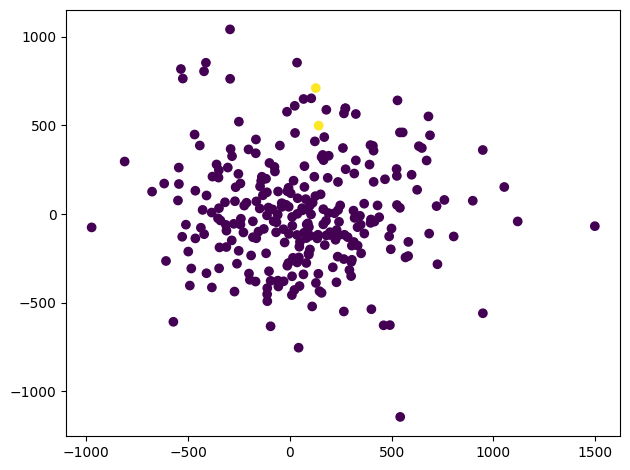

In [30]:
pca = []
names_clustering = []
c = []
for name1, val1 in face_vals.items():
    best_dist = float("inf")
    pca.append(val1)

    cc = int("" in name1 )
    c.append(cc)
    if cc:
        print(val1)

    names_clustering.append(name1)
    best_name = ""
    for name2, val2 in face_vals.items():
        if name1 != name2 and np.linalg.norm(val1 - val2) < best_dist:

            best_dist = np.linalg.norm(val1 - val2)
            best_name = name2
    #print("Najpodobnejsia tvar k", name1, "je", best_name, best_dist)
    #print(f"{name1:42} {best_name:42} {best_dist:1.18}")

pca = np.array(pca)
print(pca.shape)

plt.scatter(x=pca[:, 0], y=pca[:, 1], c=c)

In [31]:
names = []
vals = []
for name, face in face_vals.items():
    names.append(name)
    vals.append(face)

### Hľadanie lakťa na celych dátach

C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

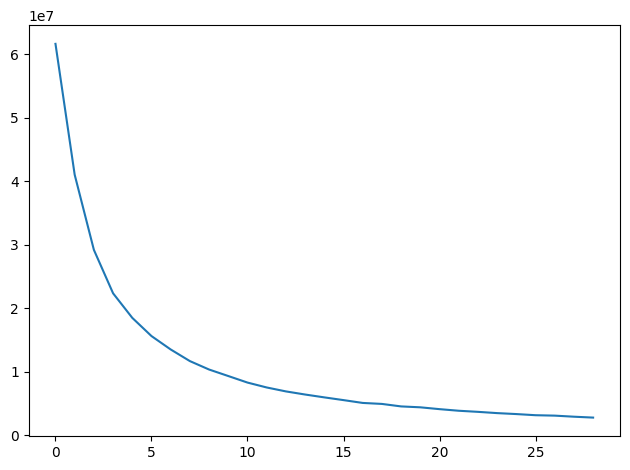

In [32]:
iner = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=3, algorithm="lloyd").fit(vals)
    iner.append(kmeans.inertia_)

plt.plot(iner)

In [40]:
kmeans = KMeans(n_clusters=15, random_state=0, algorithm="lloyd").fit(pca)
plt.scatter(x=pca[:, 0], y=pca[:, 1], c=kmeans.labels_)

C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
num_values = len(set(kmeans.labels_))

clustered = [[] for i in range(num_values)]

for cluster in range(len(kmeans.labels_)):

    clustered[kmeans.labels_[cluster]].append(names_clustering[cluster])

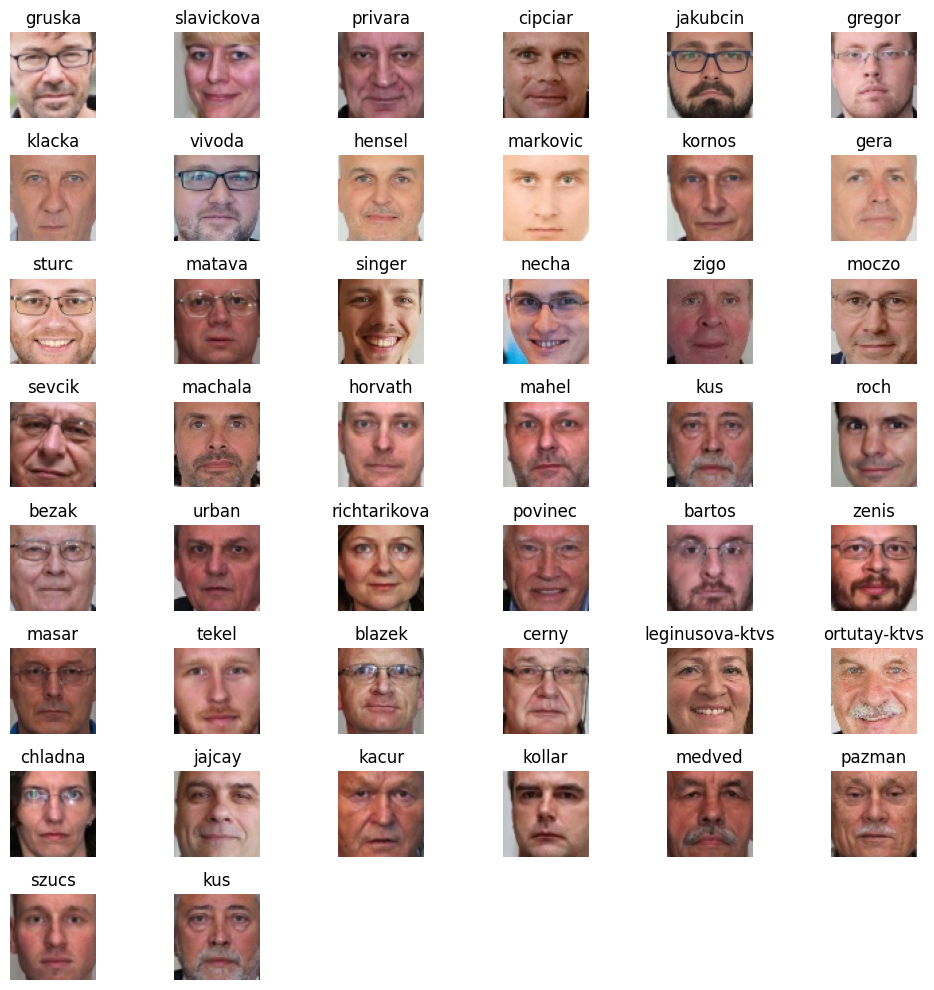

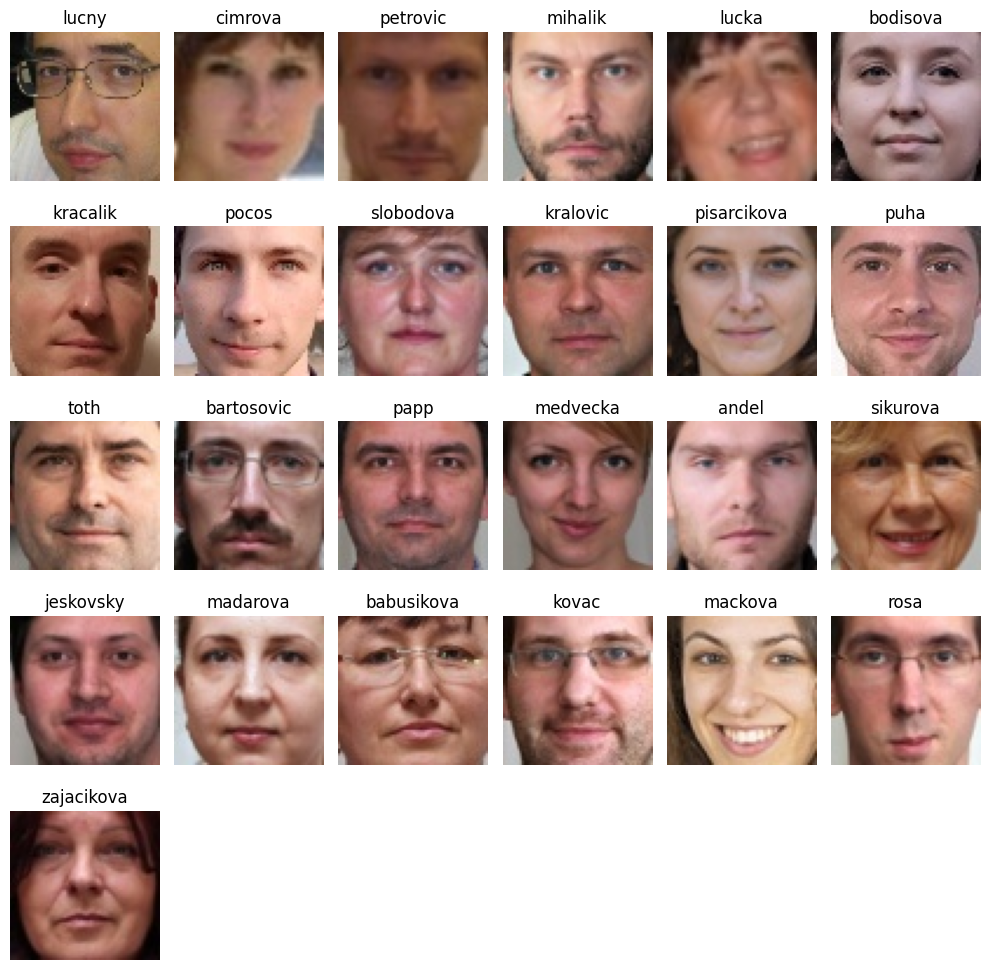

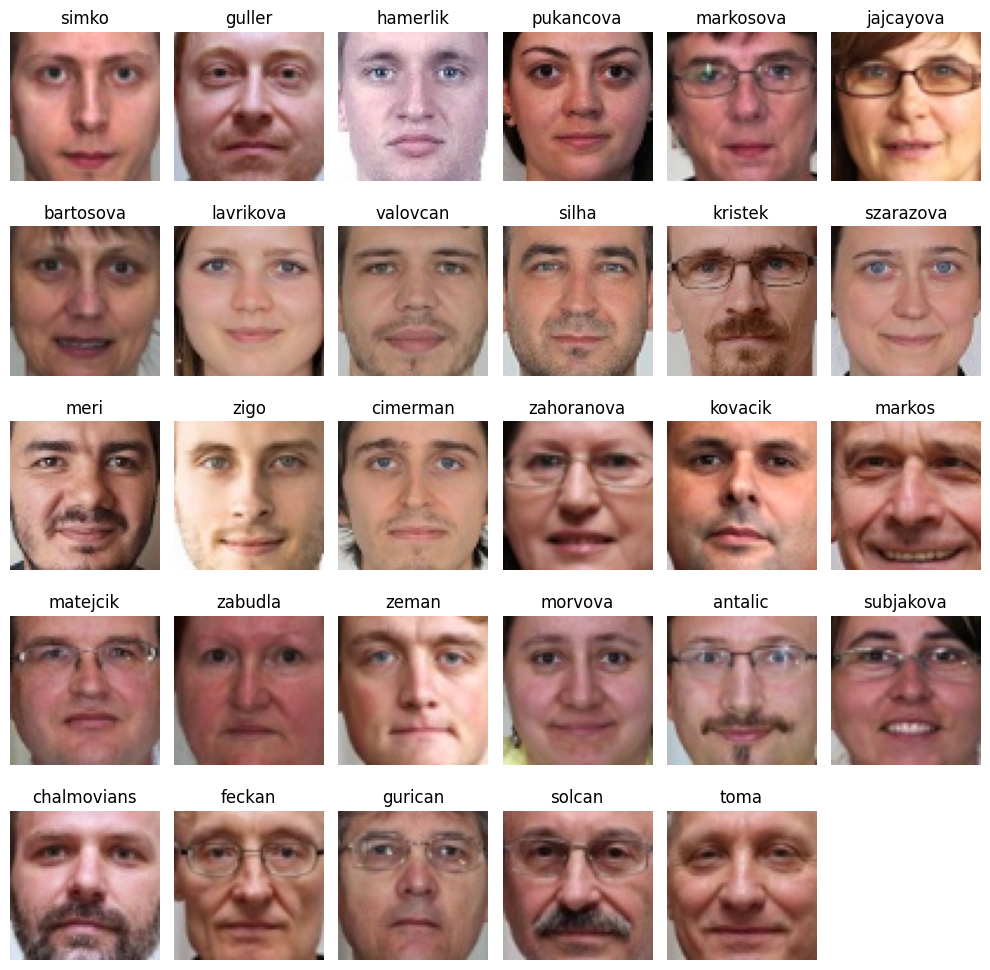

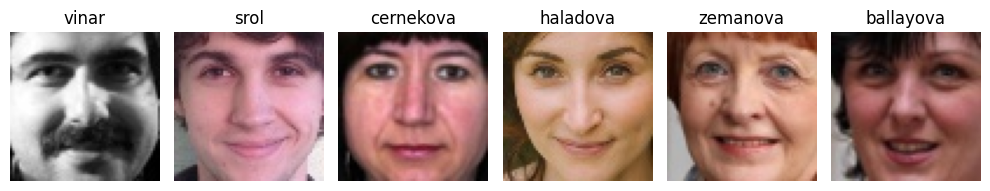

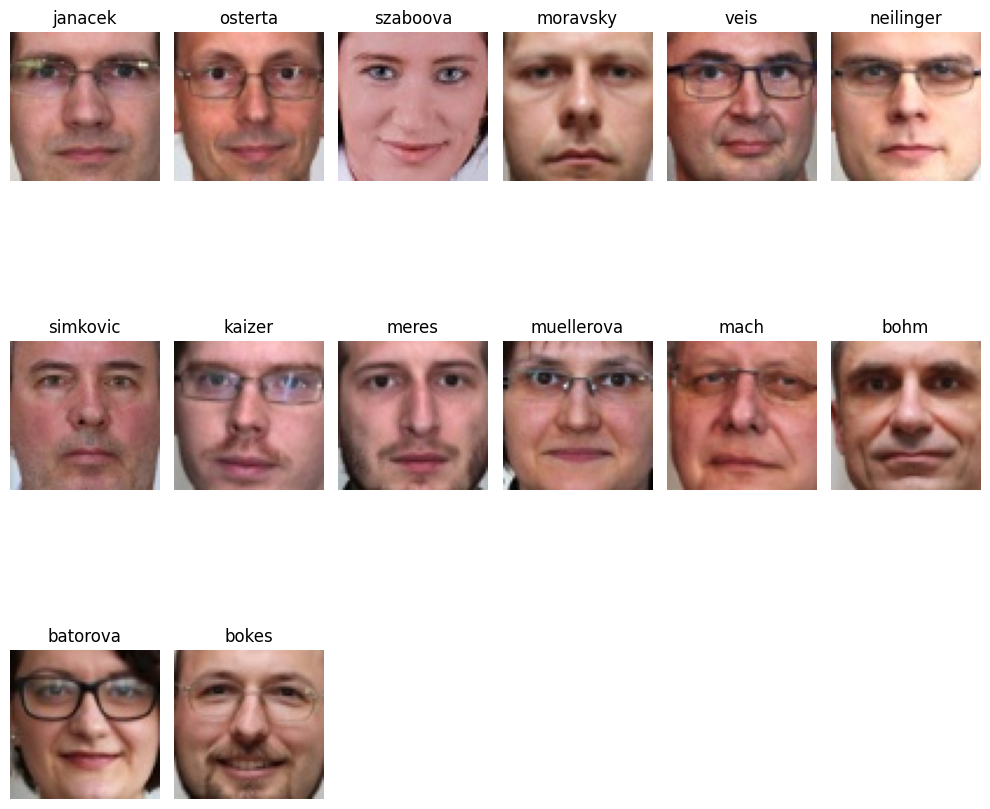

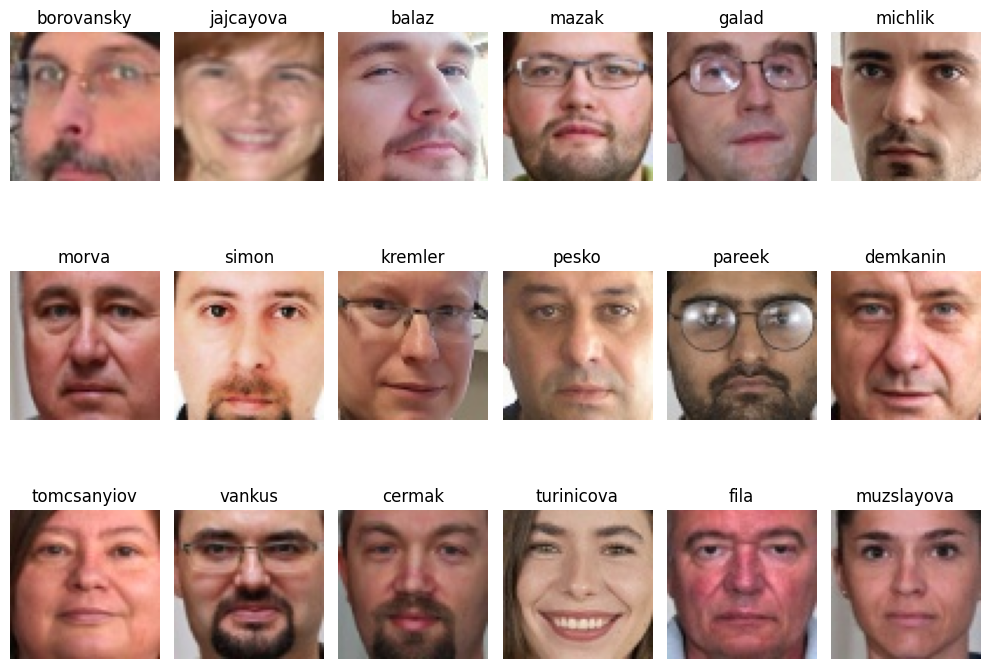

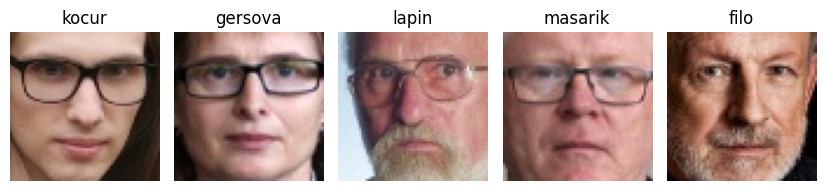

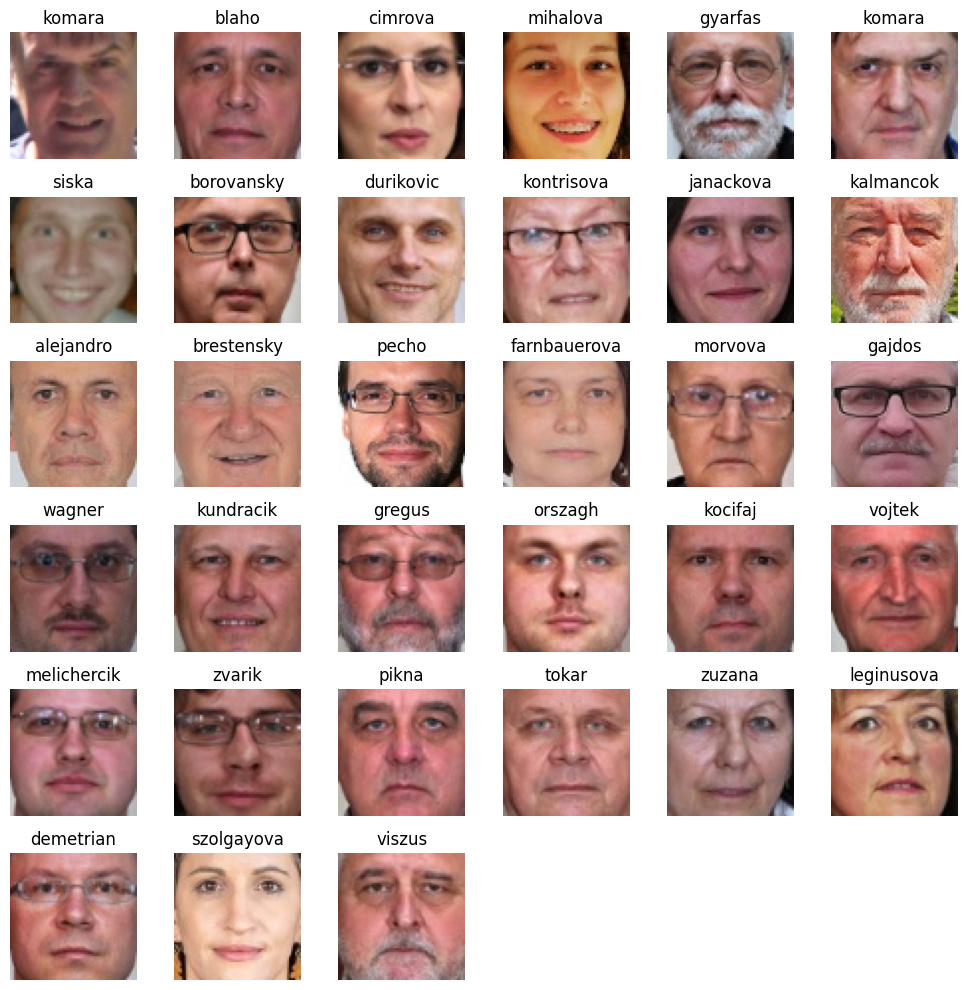

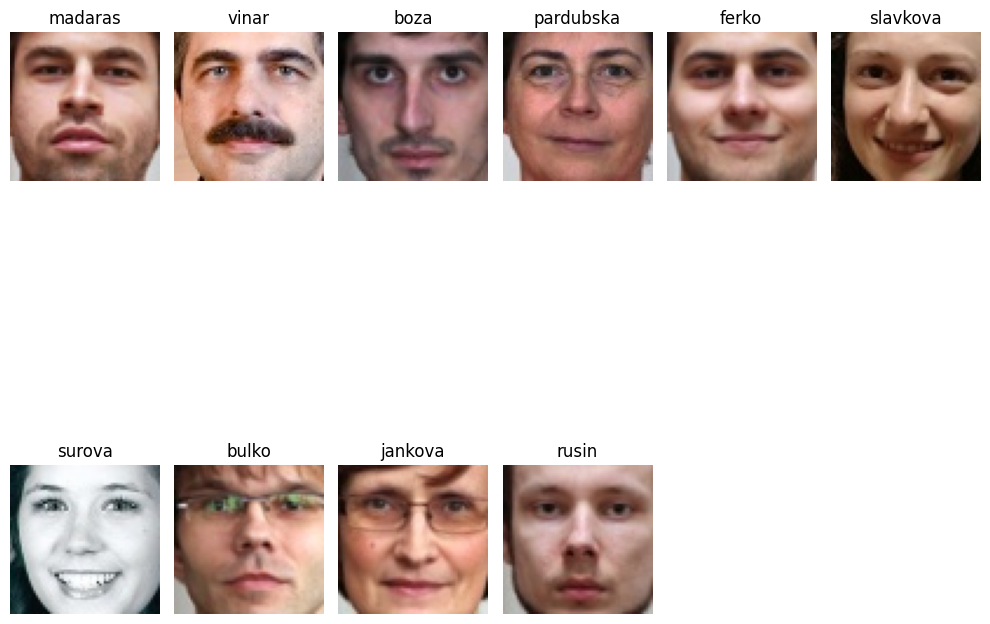

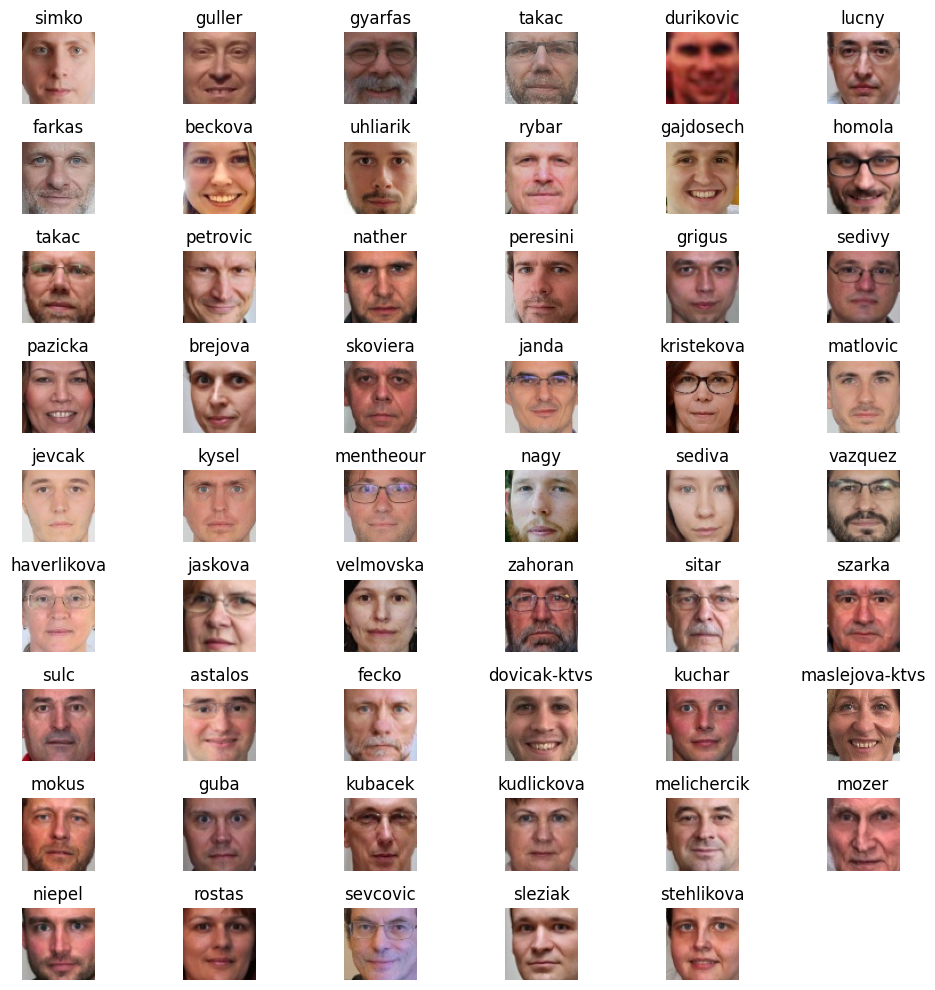

In [42]:
for cluster in clustered:

    fig = plt.figure(figsize=(10, 10))

    for j in range (len(cluster)):
        fig.add_subplot(int(len(cluster) / 6)+1, 6,j+1)
        plt.rcParams["figure.autolayout"] = True
        photo = cv2.imread("photos64/"+cluster[j])

        lastname = (cluster[j].split("_")[1]).split()

        if len(lastname) == 1:
            lastname = lastname[0].lower()
        else:
            lastname = lastname[1].lower()
        lastname = ''.join([k for k in lastname if not k.isdigit()])
        plt.axis('off')
        plt.title(lastname)

        rgb = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb, cmap = plt.cm.Spectral)
    plt.show()